# mtlab tutorial

## import repo "mtlab"
then copy the `mtlab.py` to main dir

In [1]:
!git clone "https://github.com/ttt50966/mtlab"

Cloning into 'mtlab'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 32 (delta 12), reused 21 (delta 5), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [2]:
!cp ./mtlab/mtlab.py ./

## import module "mtlab"

In [3]:
import mtlab

## help function 

In [4]:
help(mtlab)

Help on module mtlab:

NAME
    mtlab

FUNCTIONS
    diff_fit_data(params, x)
    
    diff_fitting(params, x, y)
        import lmfit
        params = lmfit.Parameters() # Add new fitting objects
        params.add('A',value=-0.08)
        params.add('B',value=0.1)
        params.add('T', value=5)
        params.add('H', value=800)
    
    diff_residual(params, x, y)
    
    fitting_init()
    
    moving_average(interval, windowsize)
        This is a smooth function
        interval is the original data
        windowsize can set 3~10
    
    plot(line, dpiValue, title, xlabel, ylabel, saveFig)
        This is a template for plotting
        line would be [{
            "x" : [],
            "y": [],
            "label" : ""
        }]
        
        dpiValue is integer like 300
        title, xlabel and ylabel are string
        saveFig is a boolean

FILE
    /content/mtlab.py




## mtlab.plot

In [5]:
import pandas as pd
df1 = pd.read_csv("/content/mtlab/test_data/plot_test.csv")
df1

,Unnamed: 0,x1,y1,x2,y2
0,0,1,4,-1,3
1,1,2,5,-2,4
2,2,3,6,-3,5


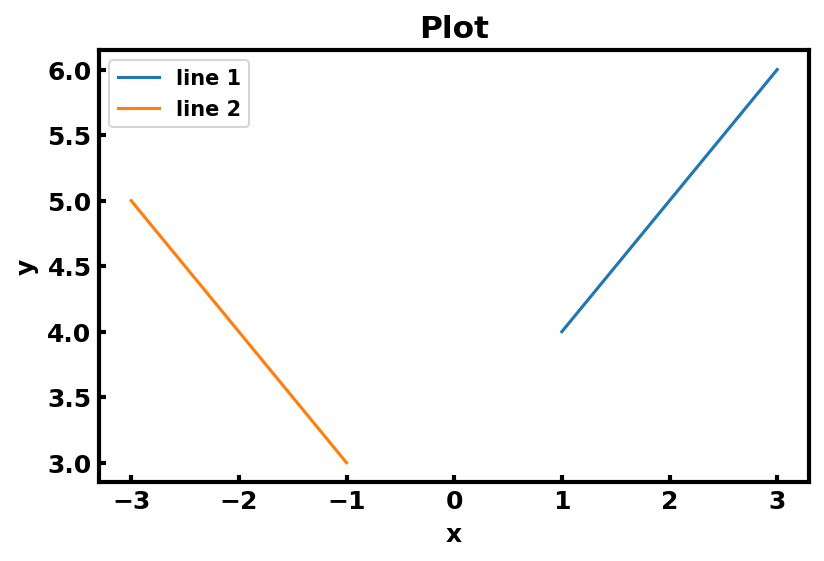

In [6]:
line = []
for i in range(1,3):
  line.append({
      "x":df1["x"+str(i)].values,
      "y":df1["y"+str(i)].values,
      "label": "line "+str(i)
      })
mtlab.plot(line,150,"Plot","x","y",False)

## Fitting

In [7]:
mtlab.fitting_init()

In [8]:
df2 = pd.read_csv("/content/mtlab/test_data/fitting.csv")
df2.head()

,Unnamed: 0,x,y
0,0,781.0,-0.000285
1,1,782.0,-0.000181
2,2,783.0,0.000094
3,3,784.5,-0.000711
4,4,785.5,-0.000363


In [9]:
data = [{
    "x":df2.x.values,
    "y":df2.y.values,
    "label":"original"
}]    

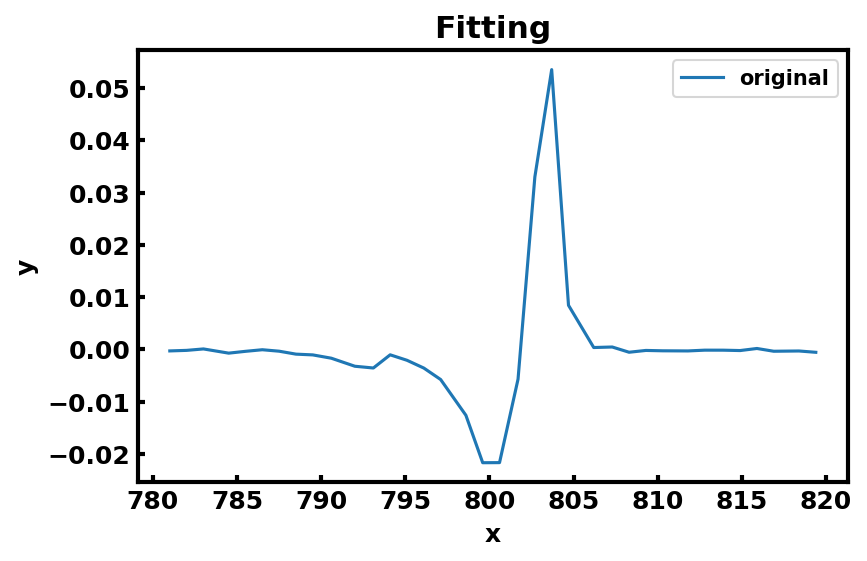

In [10]:
mtlab.plot(data,150,"Fitting","x","y",False)

In [11]:
import lmfit
params = lmfit.Parameters() # Add new fitting objects
params.add('A',value=-0.08)
params.add('B',value=0.1)
params.add('T', value=5)
params.add('H', value=800)
out = mtlab.diff_fitting(params,data[0]["x"],data[0]["y"])

In [13]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
A,-0.06436945,0.00834623,(12.97%),-0.08,-inf,inf,True
B,-0.04320465,0.00340723,(7.89%),0.1,-inf,inf,True
T,1.79757596,0.10059918,(5.60%),5,-inf,inf,True
H,802.905634,0.08493375,(0.01%),800,-inf,inf,True


In [14]:
data.append({"x":data[0]["x"],"y":mtlab.diff_fit_data(out.params,data[0]["x"]),"label":"fitting"})

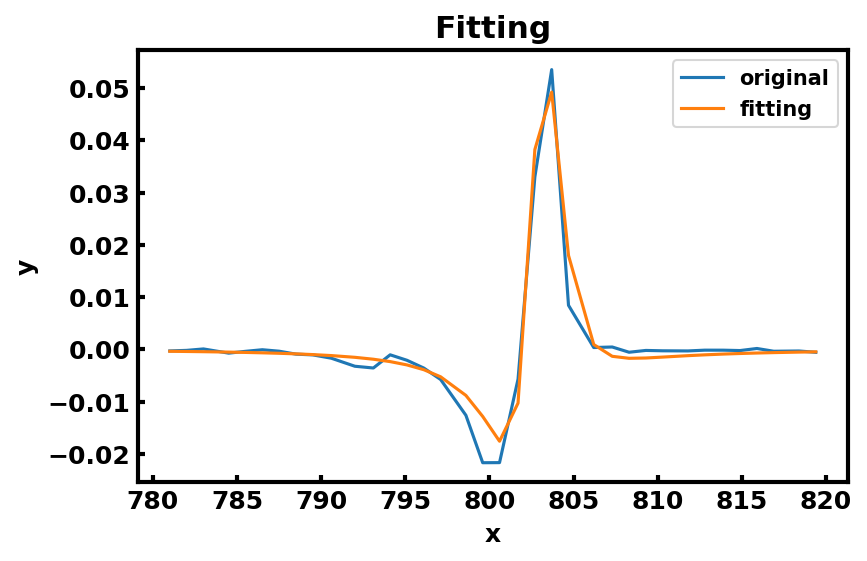

In [15]:
mtlab.plot(data,150,"Fitting","x","y",False)

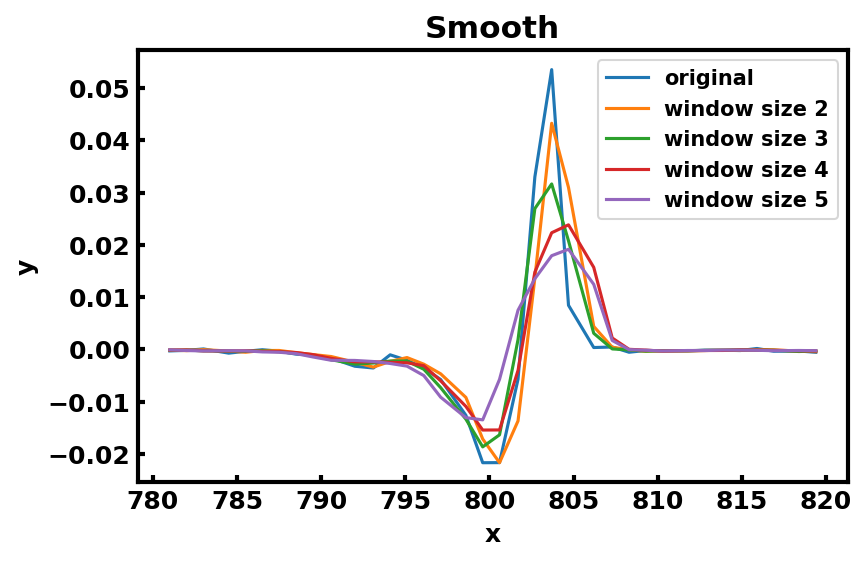

In [16]:
data_smooth = [data[0]]
for i in range(2,6):
  sm = mtlab.moving_average(data[0]["y"],i)
  d = {"x":data[0]["x"],"y":sm,"label":"window size "+str(i)}
  data_smooth.append(d)
mtlab.plot(data_smooth,150,"Smooth","x","y",False)